In [1]:
from __future__ import print_function
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import argparse
import random as rng
import math

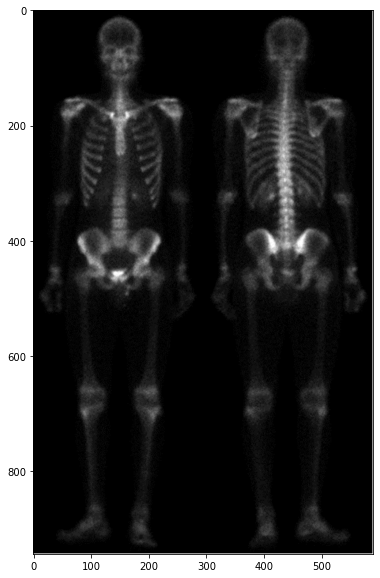

In [4]:
img = cv2.imread('D:/Education/_Masters/3rd Semester - Spring 2021/Introduction to Robot Vision System/Assignment 3/paperPhoto1.bmp', cv2.COLOR_BGR2GRAY)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.imshow(img)

In [4]:
print(img.shape)

(944, 590, 3)


In [5]:
# Flattening it to a one-dimensional array

flat = img.flatten()

In [6]:
print(flat.shape)

(1670880,)


In [7]:
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

In [8]:
def plot_histogram(y):
    xaxis = np.arange(1, 257, 1)
    plt.bar(xaxis, y)

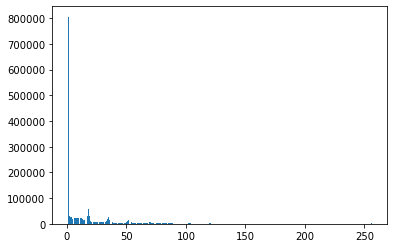

In [9]:
plot_histogram(hist)

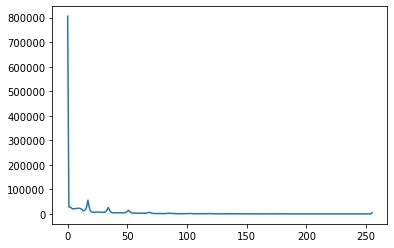

In [10]:
plt.plot(hist)

In [11]:
# Calculating the PDF, Probability Distributive function

n = np.sum(hist)
PDF = np.divide(hist, n)

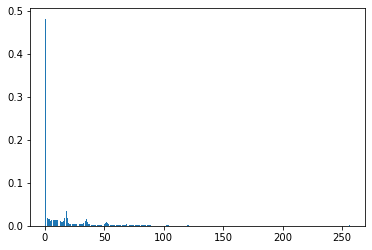

In [12]:
plot_histogram(PDF)

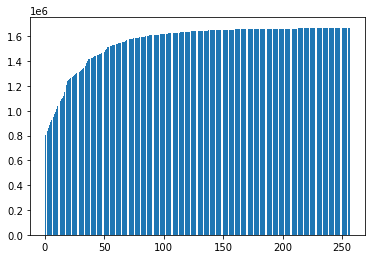

In [13]:
# create our cumulative distributive function
def cdf(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the function and get the CDF (cummulative distributive function)
cs = cdf(hist)

# display the result
#plt.plot(cs)
plot_histogram(cs)

In [14]:
print(cs)

[ 805644.  834126.  862434.  887166.  907527.  928392.  949677.  971199.
  993780. 1016994. 1039884. 1060872. 1078965. 1091910. 1105878. 1123941.
 1154172. 1210518. 1239501. 1252062. 1260003. 1266750. 1273665. 1280823.
 1287951. 1295598. 1302981. 1310016. 1316880. 1323513. 1329777. 1336830.
 1346421. 1363467. 1389804. 1406169. 1414515. 1420095. 1424931. 1429491.
 1434024. 1438692. 1443171. 1447923. 1452639. 1457070. 1461495. 1465839.
 1470873. 1477326. 1487604. 1502391. 1512879. 1518678. 1522548. 1525968.
 1528872. 1531821. 1534695. 1537698. 1540737. 1543719. 1546398. 1549257.
 1551942. 1554792. 1558263. 1563066. 1569510. 1574787. 1578174. 1580178.
 1581789. 1583370. 1584921. 1586439. 1587999. 1589508. 1590855. 1592226.
 1593555. 1595010. 1596507. 1598256. 1600749. 1603911. 1606572. 1608336.
 1609602. 1610694. 1611687. 1612554. 1613415. 1614210. 1615167. 1615938.
 1616769. 1617702. 1618668. 1619643. 1620690. 1622178. 1624008. 1625658.
 1626672. 1627473. 1628130. 1628817. 1629588. 16302

In [15]:
print(((cs[0]-cs.min())*255)/(cs.max() - cs.min()))
print(((cs[1]-cs.min())*255)/(cs.max() - cs.min()))
print(((cs[2]-cs.min())*255)/(cs.max() - cs.min()))

0.0
8.394137553222473
16.736994299821088


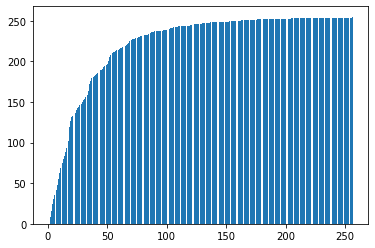

In [16]:
# normalizing the values

# numerator & denomenator
min_sub = (cs - cs.min()) * 255 
rng = cs.max() - cs.min() # range

# re-normalize the cumsum
cs = min_sub / rng

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plot_histogram(cs)

In [17]:
print(cs)

[  0   8  16  24  30  36  42  48  55  62  69  75  80  84  88  93 102 119
 127 131 133 135 137 140 142 144 146 148 150 152 154 156 159 164 172 176
 179 181 182 183 185 186 187 189 190 191 193 194 196 197 200 205 208 210
 211 212 213 214 214 215 216 217 218 219 219 220 221 223 225 226 227 228
 228 229 229 230 230 231 231 231 232 232 233 233 234 235 236 236 236 237
 237 237 238 238 238 238 239 239 239 239 240 240 241 241 241 242 242 242
 242 243 243 243 243 243 243 244 244 244 244 245 245 245 246 246 246 246
 246 246 246 247 247 247 247 247 247 247 248 248 248 248 248 248 249 249
 249 249 249 249 249 249 249 249 250 250 250 250 250 250 250 250 250 250
 251 251 251 251 251 251 251 251 251 251 251 251 251 252 252 252 252 252
 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252
 252 252 252 252 252 252 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 25

In [18]:
print(np.unique(flat))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [19]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

print(img_new.shape)

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

print(img_new.shape)

(1670880,)
(944, 590, 3)


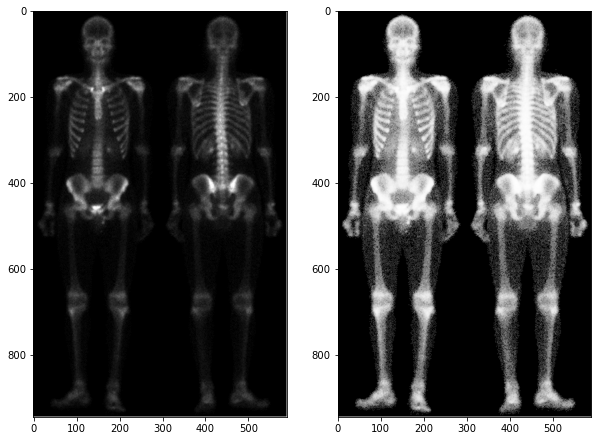

In [20]:
# Plotting the result

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

# display the old image
fig.add_subplot(1,2,1)
plt.imshow(img)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new)

plt.show(block=True)